In [ ]:
#Removing Duplicates
#Fixing NULL values(Region,NA_Sales)
# Standardizing categorical values(Country)
#Renaming Columns
#Handling Outliers(Global Sales)

#Create a Bar Chart('National Sales by Region and Country)
#Create Box Plot('Global Sales By Platform)


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame = df

df = pd.read_csv('C:/Users/hoi-group1712/Desktop/VideoGamesProject/VideoGamesSales.csv')
# df = df[df.duplicated()]
df = df.drop_duplicates()
df['Region'] = df['Region'].fillna('North')
df['NA_Sales'] = df['NA_Sales'].replace('[$]', '', regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors = 'coerce')
avg_sales = df['NA_Sales'].mean()
avg_sales = int(avg_sales)
df['NA_Sales'] = df['NA_Sales'].fillna(avg_sales)#df['Country'] = df['Country'].replace({'USA':'United States'})
df['Country'] = df['Country'].str.title()
df = df.rename(columns={'NA_Sales' : 'National Sales', 'Global_Sales' : 'Global Sales', 'NA_Profit' : 'National Profit','Global_Profit' : 'Global Profit'})
sales_cap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,2.07,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,2.07,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


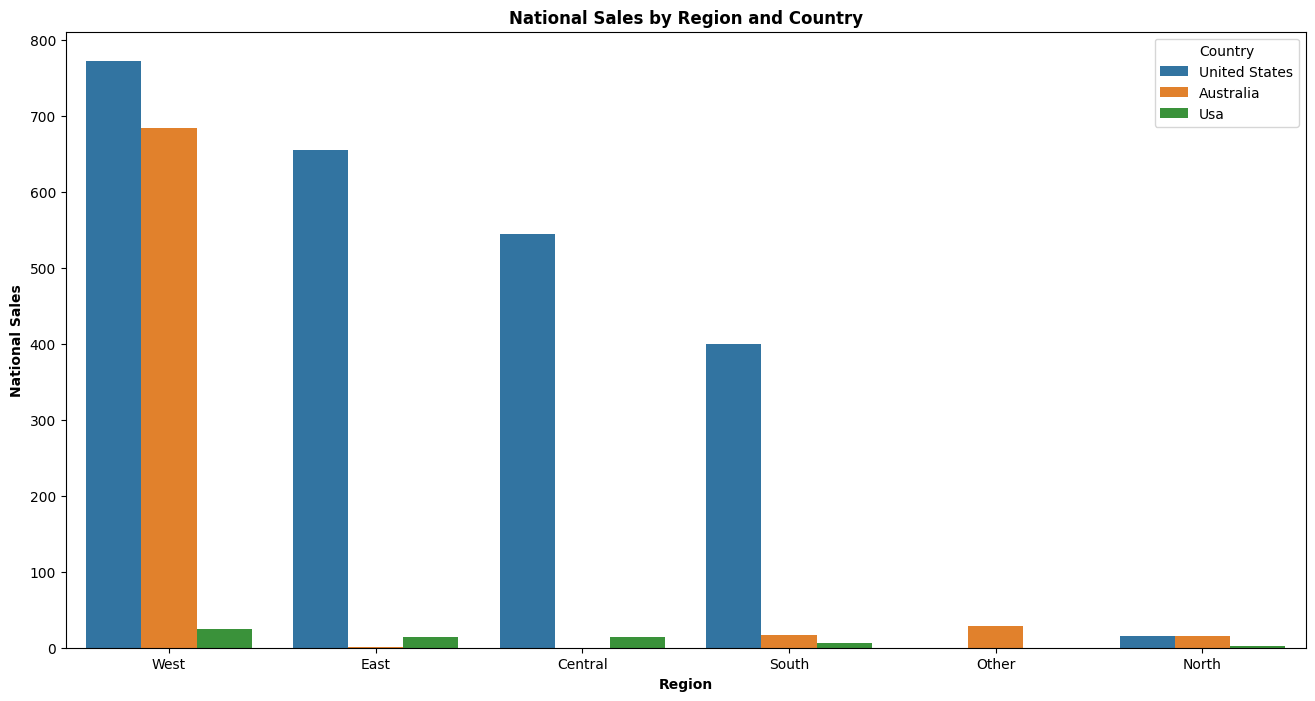

In [18]:
#create a bar Chart

National_sales = df.groupby(['Region', 'Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales',ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(data= National_sales, x= 'Region', y= 'National Sales', hue= 'Country')
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

<Axes: xlabel='Country', ylabel='National Sales'>

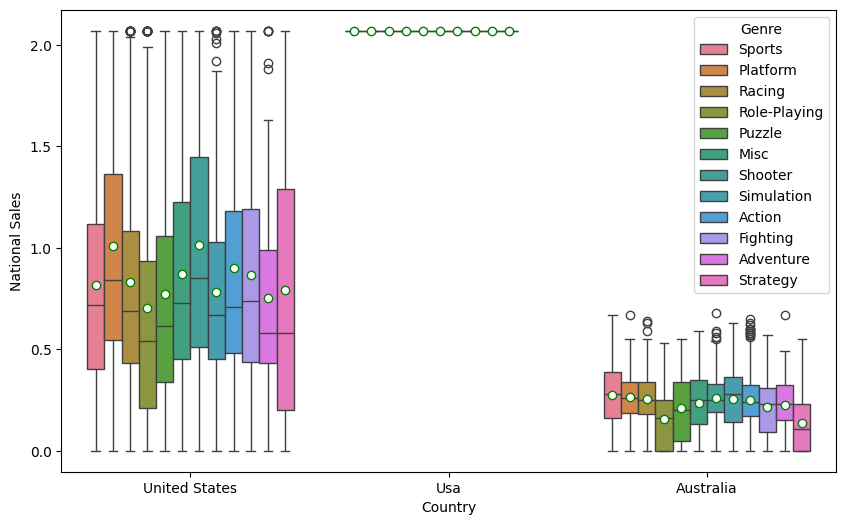

In [22]:
#Create Box Plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='National Sales', data=df, showmeans= True, hue='Genre', meanprops= {"marker" : "o"
                                                                                              , "markerfacecolor" : "white"
                                                                                              , "markersize" : 6
                                                                                              , "markeredgecolor" : "green"})
                                                                                     


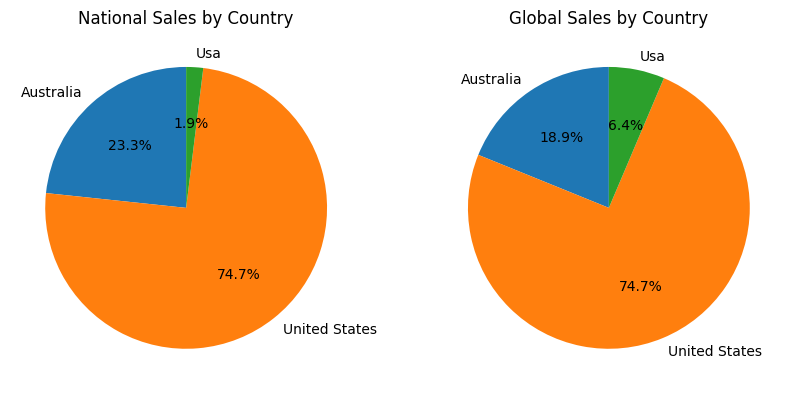

In [30]:
#create a pie Chart

Sales = df.groupby(['Country'])[['National Sales', 'Global Sales']].sum().reset_index()
Country = Sales['Country']
National_sales = Sales['National Sales']
Global_Sales = Sales['Global Sales']

fig, axs = plt.subplots(1, 2, figsize= (10,7))

axs[0].pie(National_sales, labels= Country, autopct= '%1.1f%%', startangle = 90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels= Country, autopct= '%1.1f%%', startangle = 90)
axs[1].set_title('Global Sales by Country')
plt.show()

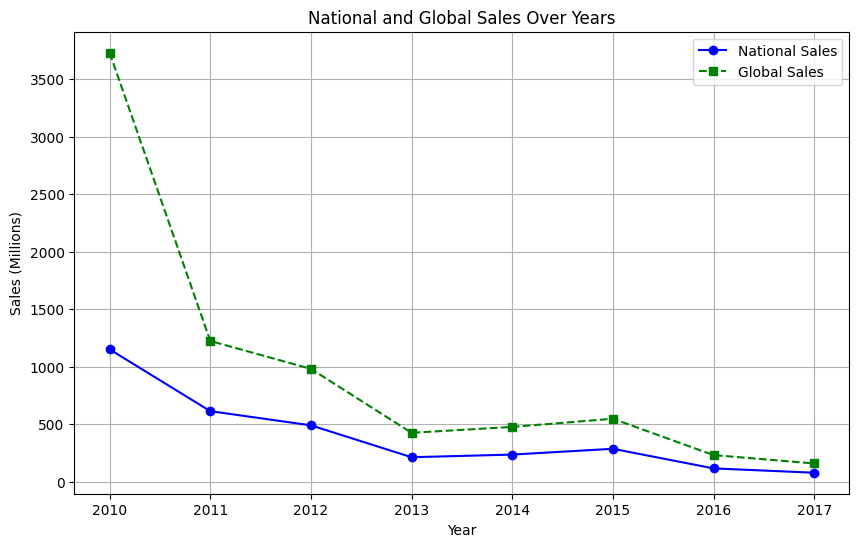

,National Sales,Global Sales
Year,,
2010,1152.00,3731.44
2011,614.65,1224.99
2012,491.29,982.29
2013,214.02,426.49
2014,237.01,477.66
2015,287.49,548.70
2016,116.89,232.75
2017,79.29,159.61


In [37]:
# Create a line chart

# تجميع البيانات حسب السنة
sales_by_year = df.groupby('Year')[['National Sales', 'Global Sales']].sum().reset_index()

# الرسم بعد التجميع
plt.figure(figsize=(10,6))

plt.plot(sales_by_year['Year'], sales_by_year['National Sales'], marker='o', linestyle='-', color='b', label='National Sales')
plt.plot(sales_by_year['Year'], sales_by_year['Global Sales'], marker='s', linestyle='--', color='g', label='Global Sales')

plt.title('National and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()

df.groupby('Year')[['National Sales', 'Global Sales']].sum()
